In [1]:
# importing libraries
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

from sklearn.preprocessing import label_binarize
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif

# Dataset Source
https://www.kaggle.com/code/chineduukpai/air-quality-and-pollution/input?select=updated_pollution_dataset.csv

In [39]:
#reading the dataset
df = pd.read_csv("updated_pollution_dataset.csv")
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


# Data Visualization and Analysis #

In [38]:
df.shape

(5000, 10)

In [4]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


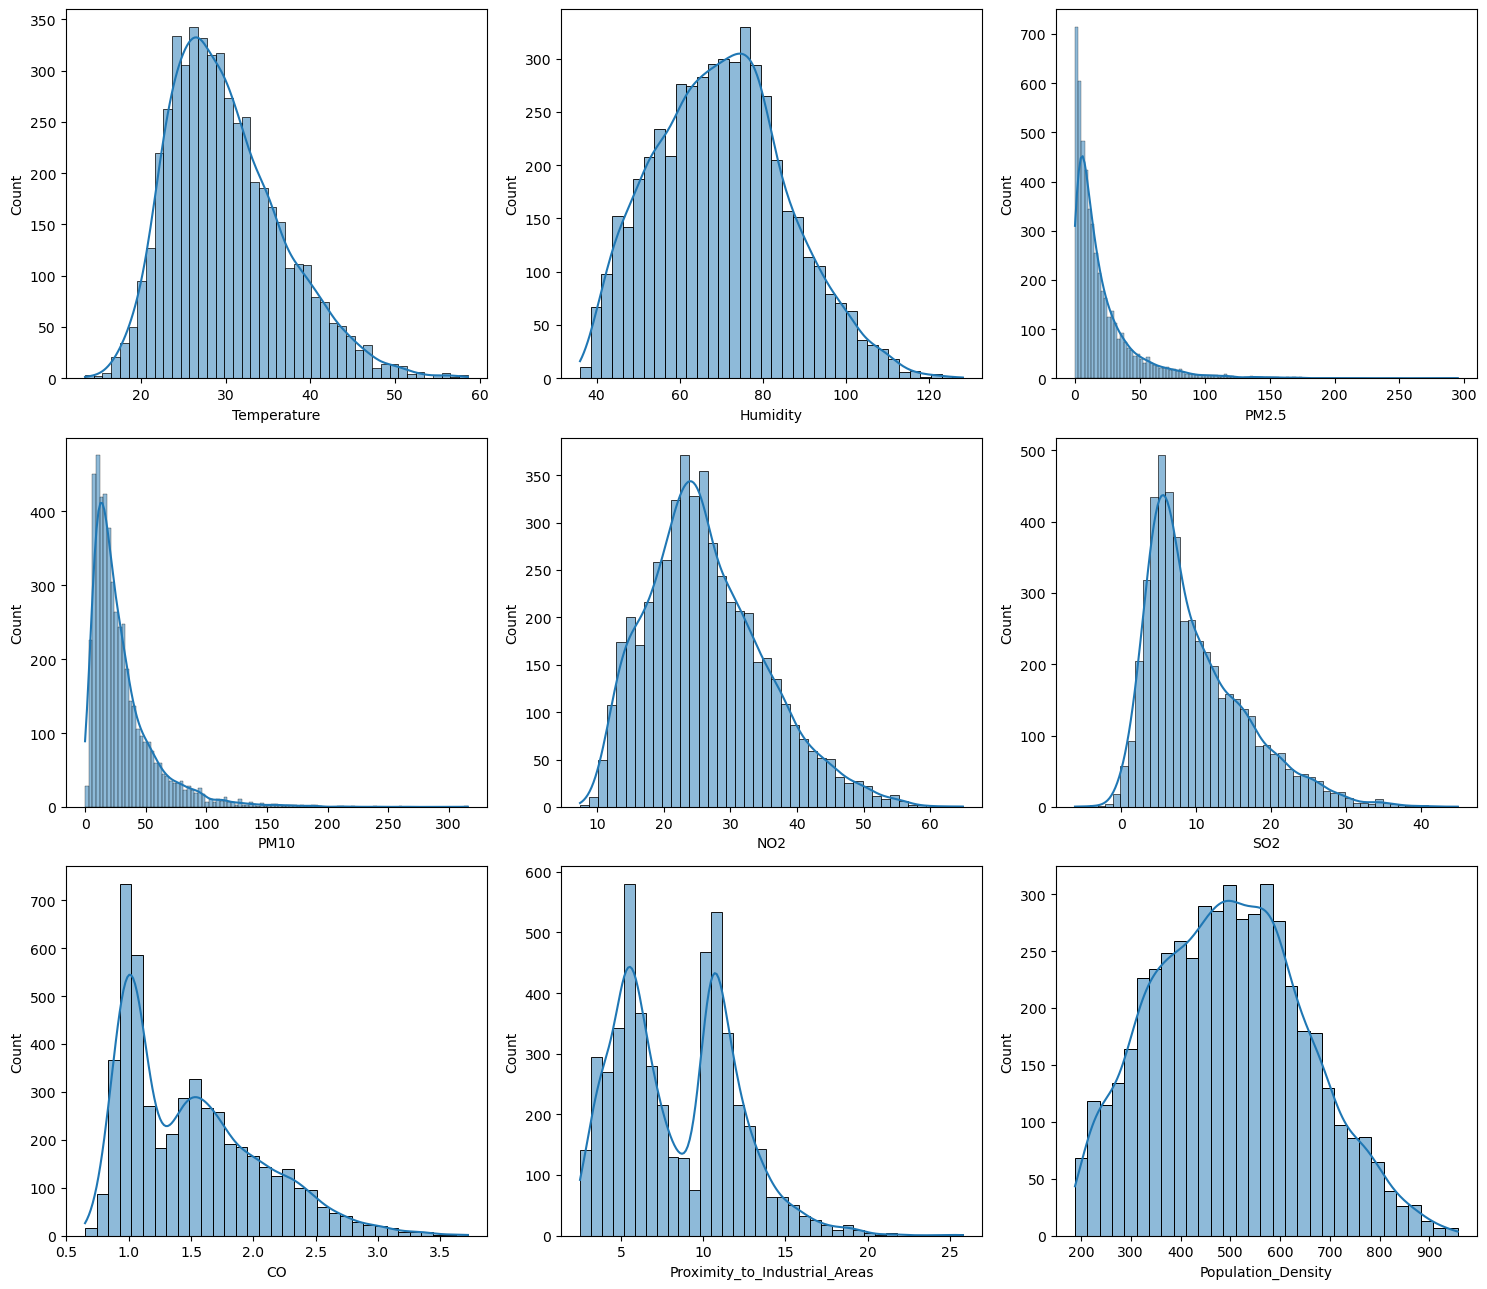

In [7]:
# Visualizing the distributions of all columns except the target variable(Air Quality) using Histograms

fig, ax = plt.subplots(3,3,figsize = (15,13))
ax = ax.flatten()

i = 0
for col in df.columns:
    if(col!='Air Quality'): #skiping the target column bcz its not continous value col
        sns.histplot(data=df,x=col,kde=True,ax=ax[i])
        i+=1
plt.tight_layout()

In [8]:
df['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

Total number of samples per Air Quality class in the test data:

Good: 2000 samples
Moderate: 1500 samples
Poor: 1000 samples
Hazardous: 500 samples


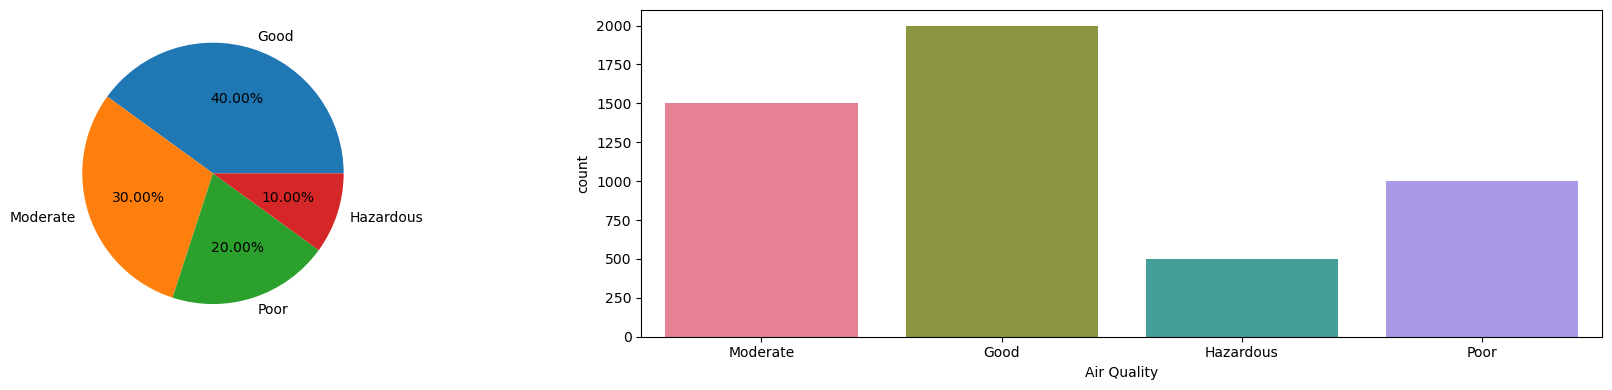

In [9]:
#Visualizing the Target Variable
fig,ax=plt.subplots(1,2,figsize=(19,4))

tdf=df['Air Quality'].value_counts().reset_index()
ax[0].pie(tdf['count'],labels=tdf[col],autopct='%.2f%%')
ax[0].set_aspect('equal')
# Count of each class in the test data
class_counts = df["Air Quality"].value_counts()

# Display class-wise count
print("Total number of samples per Air Quality class in the test data:\n")
for label, count in class_counts.items():
    print(f"{label}: {count} samples")
colors = sns.color_palette("husl", len(class_counts))
sns.countplot(data=df,x=col,ax=ax[1],palette=colors)

plt.tight_layout()
plt.show()

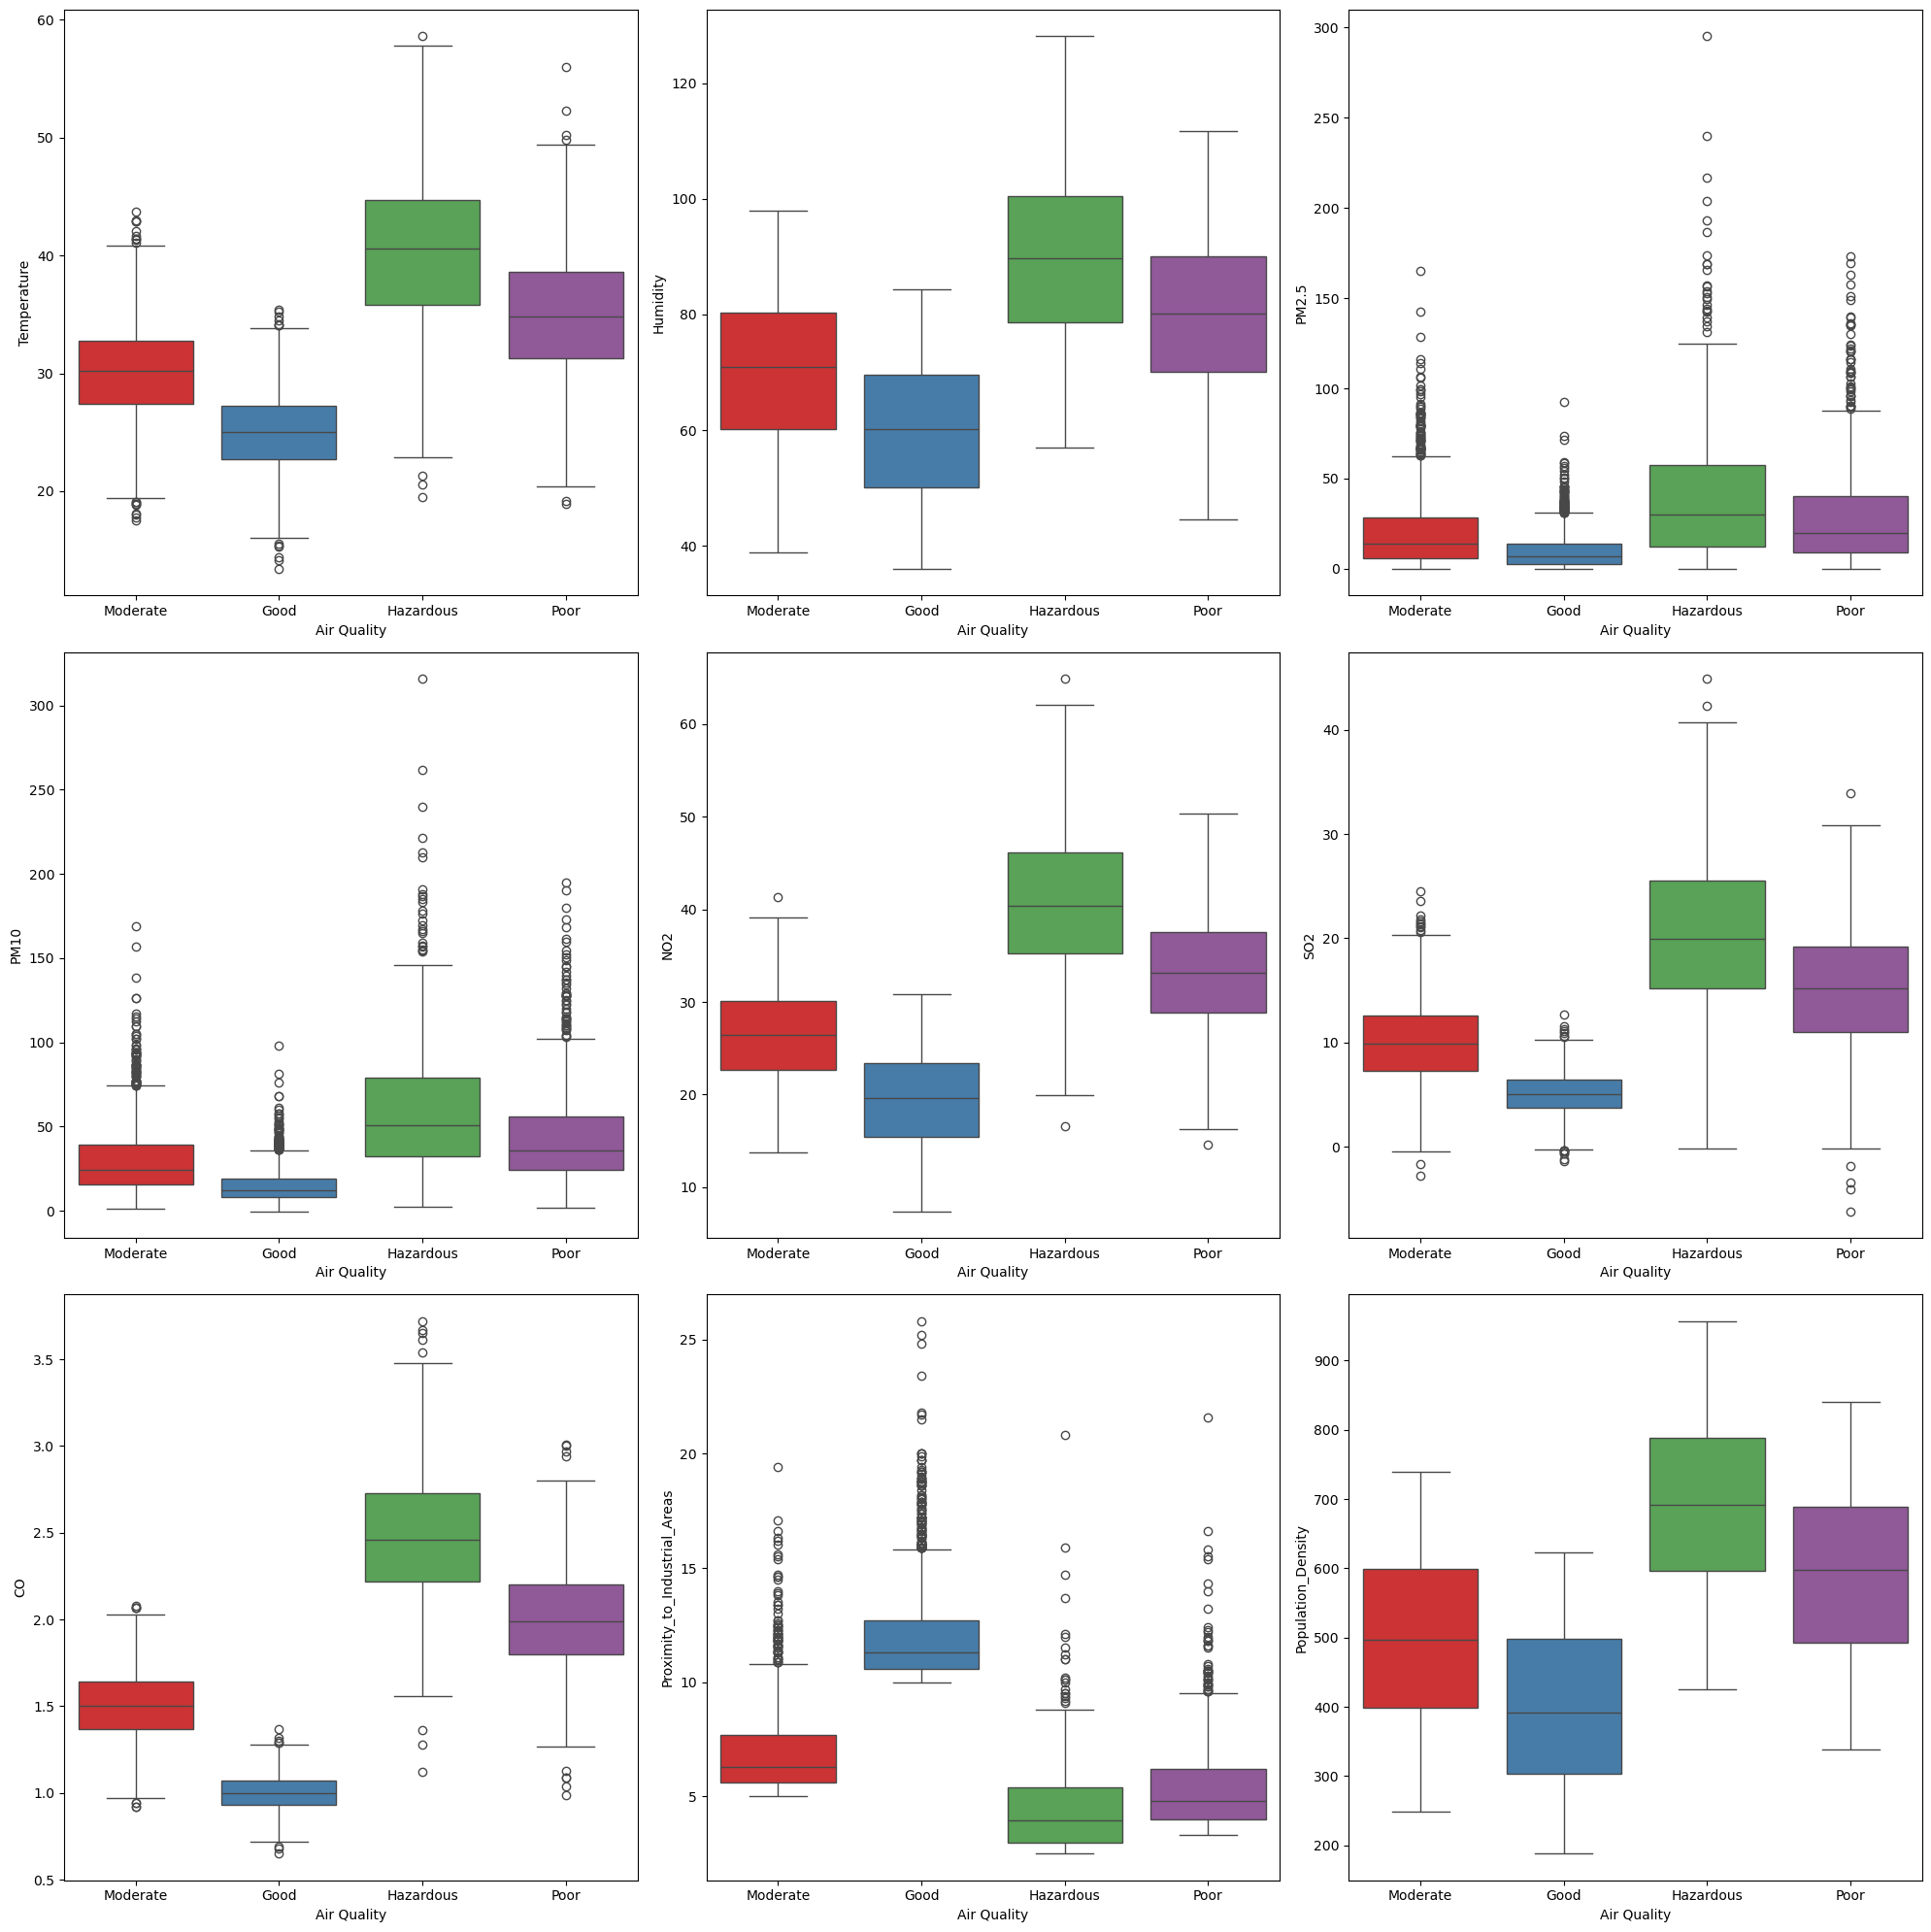

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))

ax = ax.flatten()
i = 0
cols=df.drop(columns='Air Quality')
for col in cols:
    sns.boxplot(data=df, x='Air Quality', y=col, ax=ax[i], palette='Set1')
    i += 1
plt.tight_layout()
plt.show()

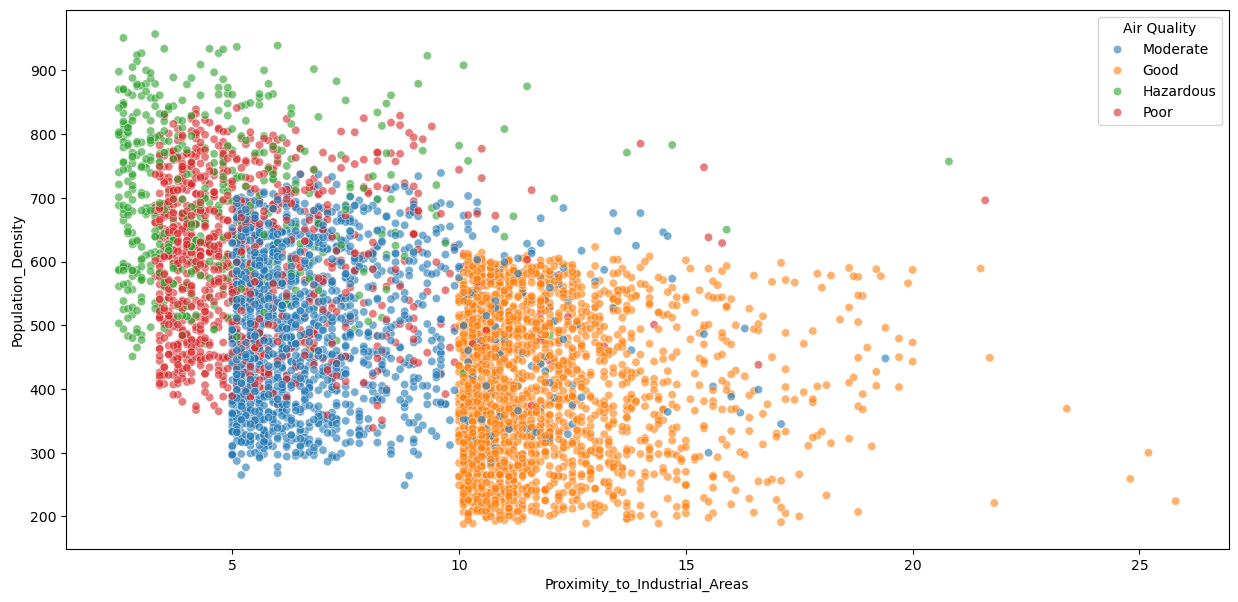

In [11]:
#scatter plot between Proximity to industrial areas and Population Density
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x='Proximity_to_Industrial_Areas',y='Population_Density',hue='Air Quality',alpha=0.6)
plt.show()

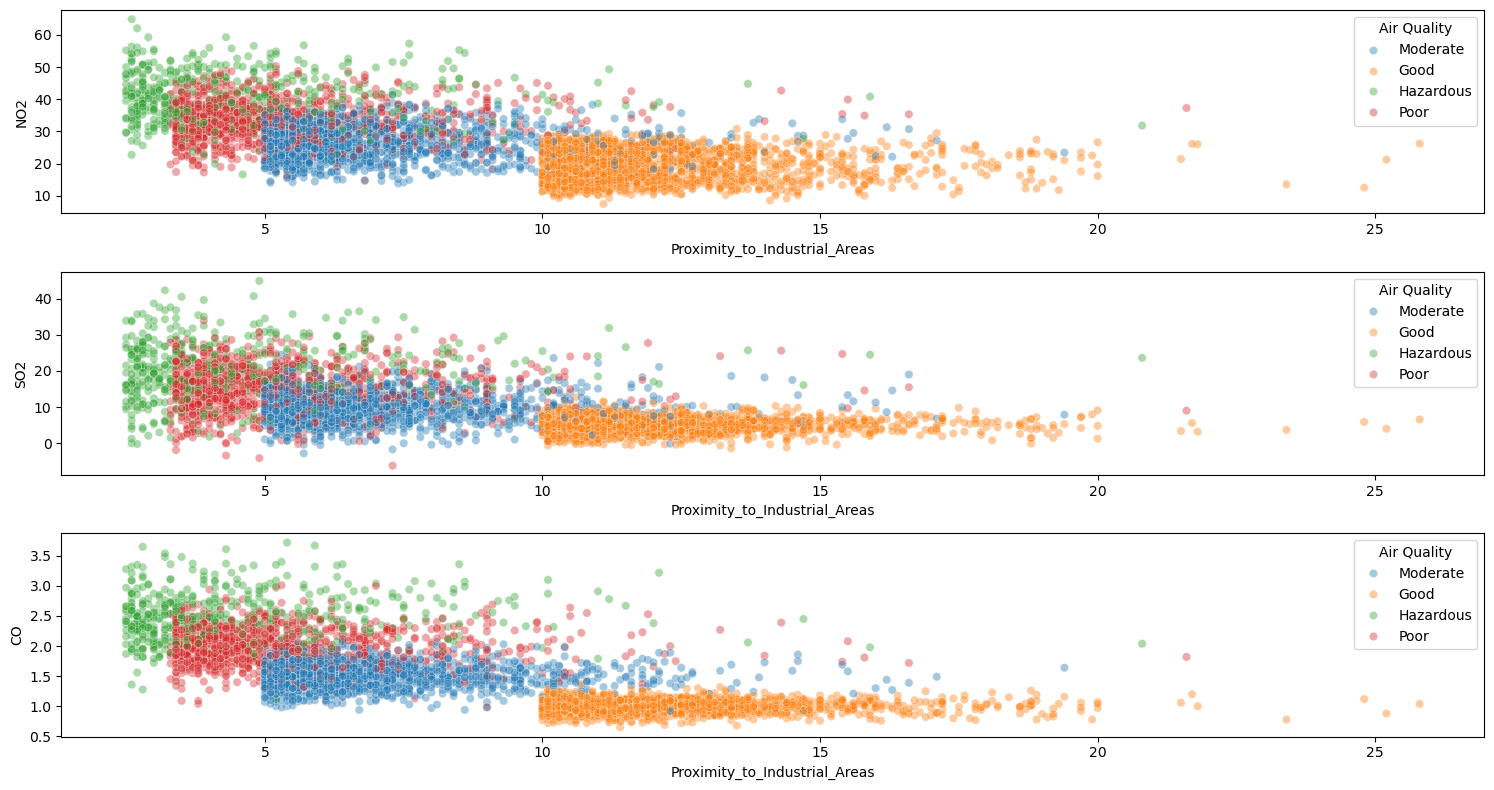

In [12]:
#changes of NO2, SO2 and CO gases based on the location of Industrial Areas

fig,ax=plt.subplots(3,1,figsize=(15,8))
sns.scatterplot(data=df,y='NO2',x='Proximity_to_Industrial_Areas',alpha=0.4,ax=ax[0],hue='Air Quality')
sns.scatterplot(data=df,y='SO2',x='Proximity_to_Industrial_Areas',alpha=0.4,ax=ax[1],hue='Air Quality')
sns.scatterplot(data=df,y='CO',x='Proximity_to_Industrial_Areas',alpha=0.4,ax=ax[2],hue='Air Quality')
plt.tight_layout()
plt.show()

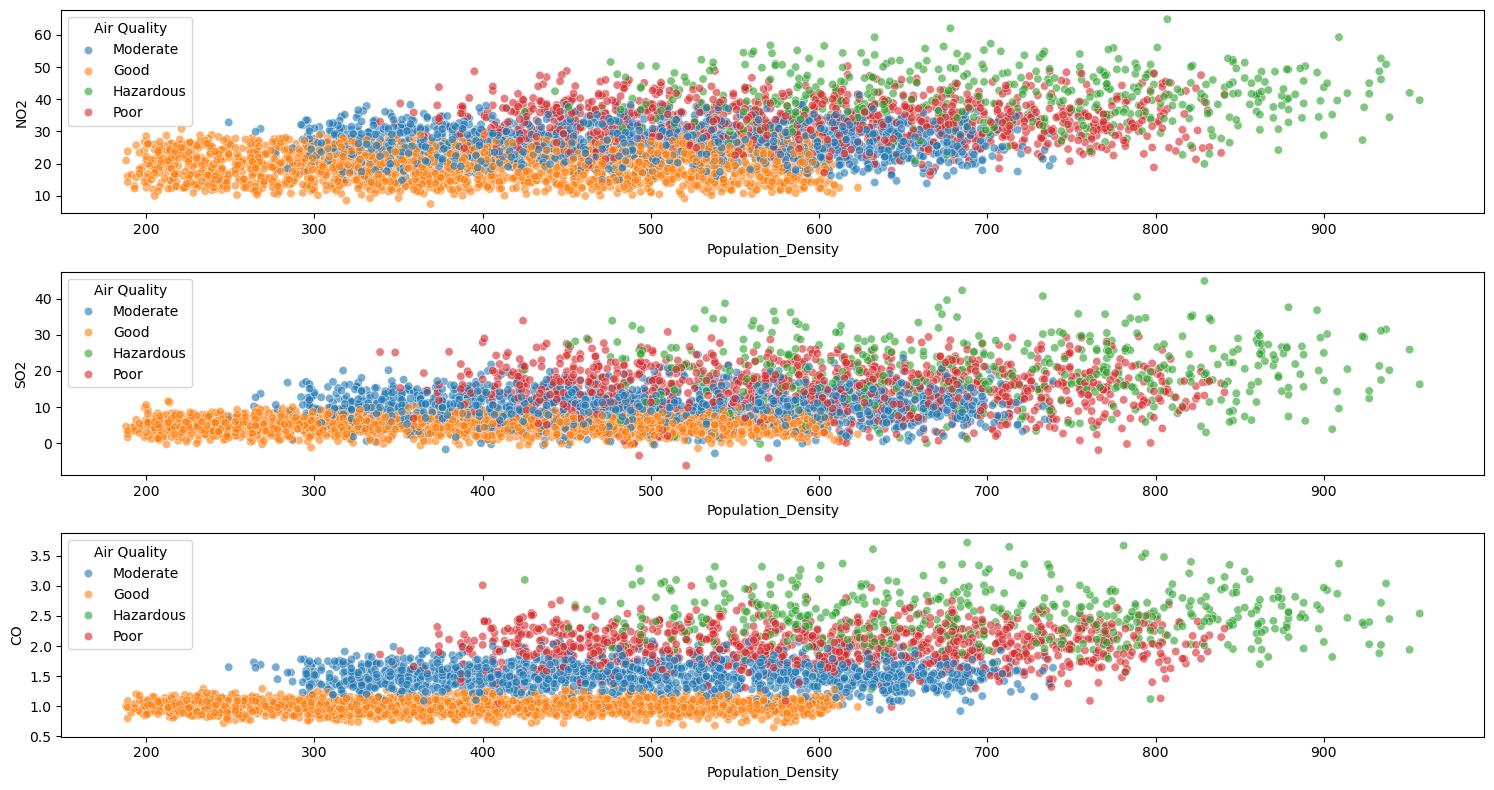

In [13]:
# visualizing the varation of gases based on Population and How that affects the Quality of Air
fig,ax=plt.subplots(3,1,figsize=(15,8))

sns.scatterplot(data=df,y='NO2',x='Population_Density',alpha= 0.6,ax= ax[0],hue= 'Air Quality')
sns.scatterplot(data=df,y='SO2',x='Population_Density',alpha= 0.6,ax= ax[1],hue= 'Air Quality')
sns.scatterplot(data=df,y='CO',x='Population_Density',alpha= 0.6,ax= ax[2],hue= 'Air Quality')

plt.tight_layout()
plt.show()

In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [15]:
df.isnull().any()

Temperature                      False
Humidity                         False
PM2.5                            False
PM10                             False
NO2                              False
SO2                              False
CO                               False
Proximity_to_Industrial_Areas    False
Population_Density               False
Air Quality                      False
dtype: bool

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


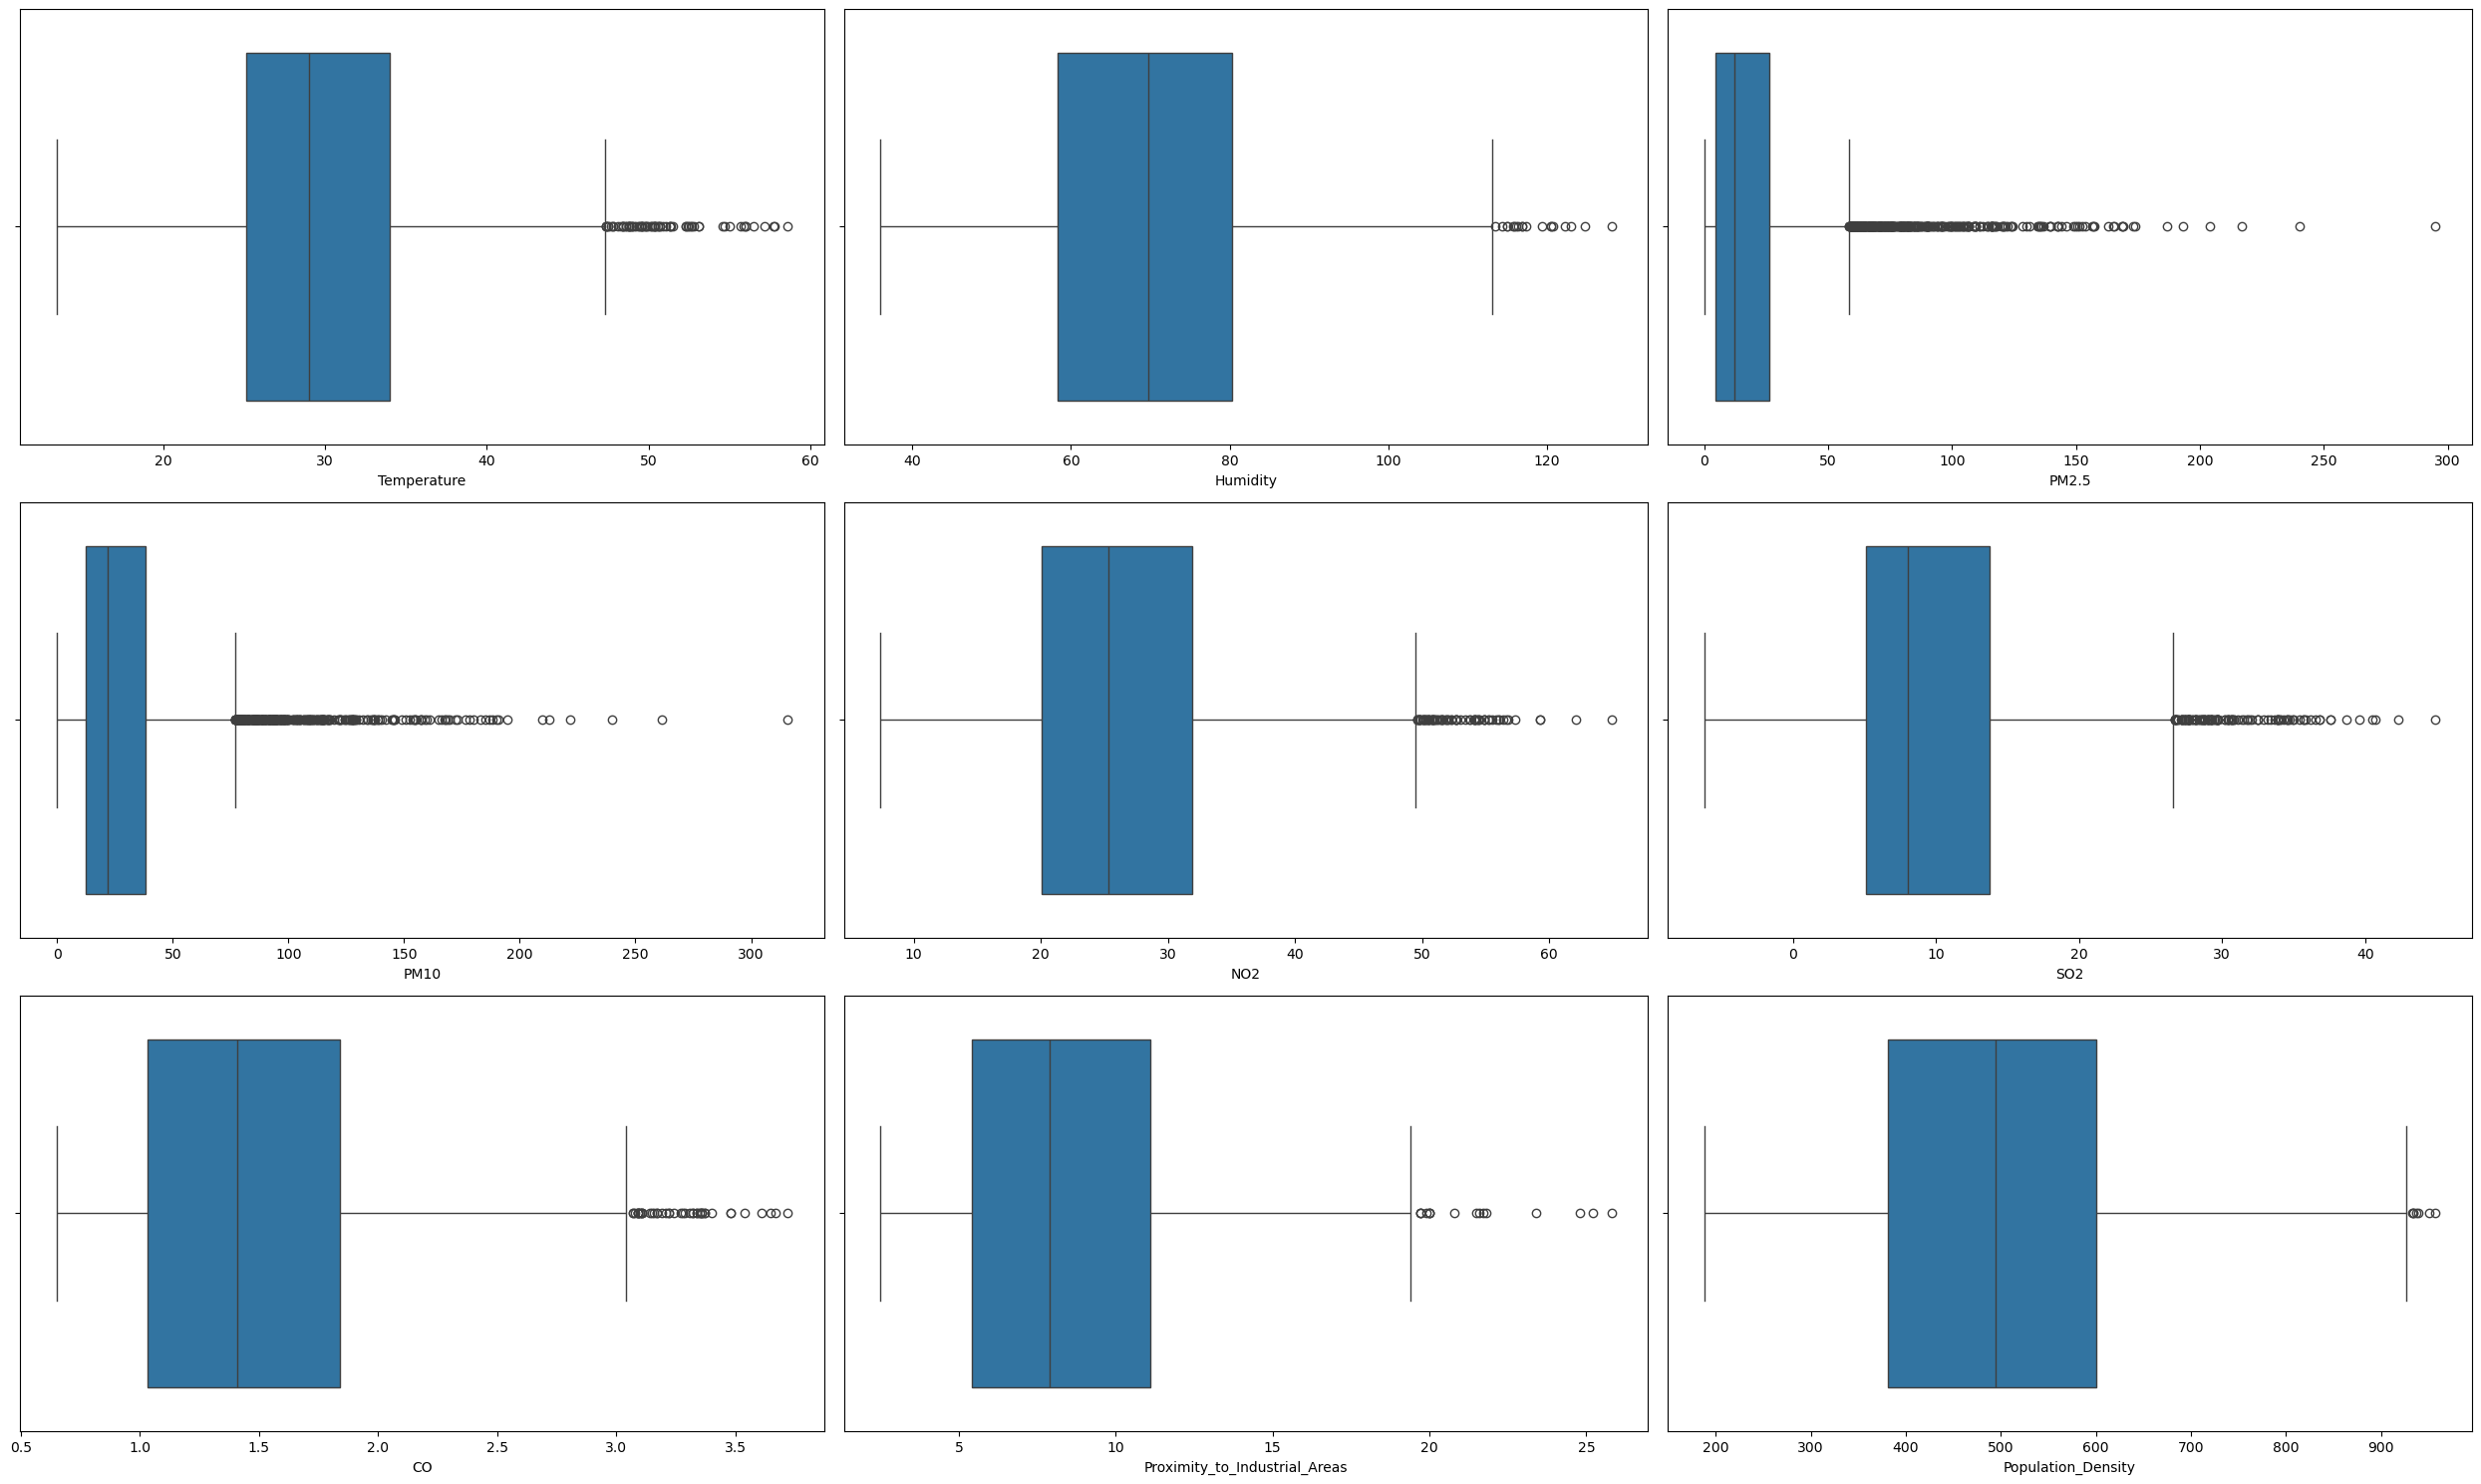

In [17]:
#checking for outliers using boxplot

fig,ax=plt.subplots(3,3,figsize=(25,15))
ax=ax.flatten()

i=0
for col in df.columns:
    if col!='Air Quality' and i<9:
        sns.boxplot(data=df,x=col,ax=ax[i])
        i+=1

plt.tight_layout()
plt.show()

In [18]:
#removing the outlirs using the inter quartile range method

for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df = df[(df[col] >= q1 - 1.5 * iqr) & (df[col] <= q3 + 1.5 * iqr)]

In [19]:
# Encoding the target variable
le = LabelEncoder()

In [20]:

df['Air Quality'] = le.fit_transform(df['Air Quality'])

df['Air Quality']

0       2
1       2
2       2
3       0
4       0
       ..
4993    2
4994    0
4996    2
4997    2
4998    0
Name: Air Quality, Length: 4158, dtype: int32

In [21]:
#Now mapping of categories in the target variable  to the numerical labels
labl_maping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Labels Mapping:", labl_maping)

Labels Mapping: {'Good': 0, 'Hazardous': 1, 'Moderate': 2, 'Poor': 3}


In [22]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0
...,...,...,...,...,...,...,...,...,...,...
4993,34.9,77.7,32.3,47.1,17.4,11.5,1.63,8.8,541,2
4994,31.1,61.0,27.1,31.1,13.0,3.8,0.98,13.4,278,0
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,2
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,2


<Axes: >

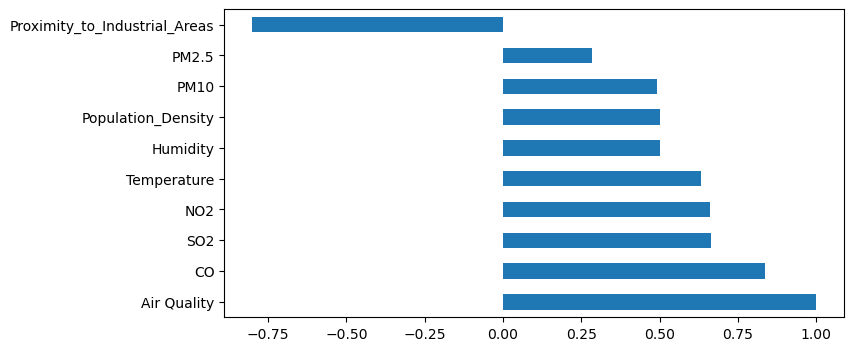

In [23]:
#checking the Correlation Air Quality with other variables:
plt.figure(figsize=(8,4))
df.corr()['Air Quality'].sort_values(ascending = False).plot(kind='barh')

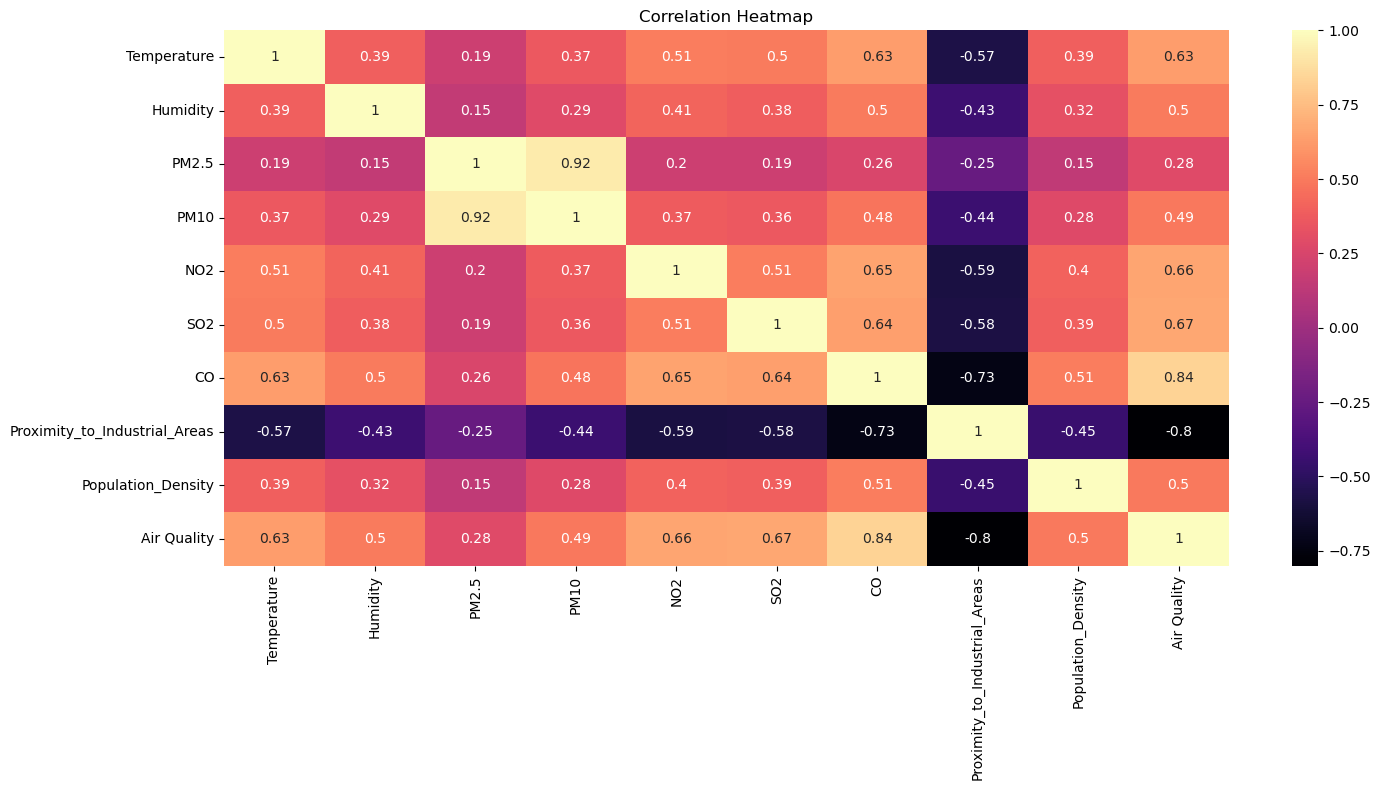

In [24]:
#corr heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [25]:
#splitting the data into training and testing sets
x=df.drop(columns='Air Quality')
y=df['Air Quality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=20)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3118, 9) (3118,) (1040, 9) (1040,)


# 1st Model Random Forest #

In [26]:
rf = RandomForestClassifier()

# parameter selection for model
paramter={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,41)),
        'min_samples_leaf':list(np.arange(2,41)),'max_features':['sqrt','log2',None],'n_estimators':[400]}

# Training model and finding the optimal parameters
nrf=RandomizedSearchCV(rf,param_distributions=paramter,random_state=20,cv=10,scoring='accuracy',n_jobs=-1)

nrf.fit(x_train,y_train)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_


# saving model performace on training data for visualization 
pred_train_data=nrf.predict(x_train)

# saving performace on testing data for visualization 

pred_test_data=nrf.predict(x_test)

{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'criterion': 'gini'}
0.9653619424519746


Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       0.80      0.31      0.44        13
           2       0.94      0.98      0.96       366
           3       0.91      0.89      0.90       178

    accuracy                           0.96      1040
   macro avg       0.91      0.79      0.83      1040
weighted avg       0.96      0.96      0.96      1040



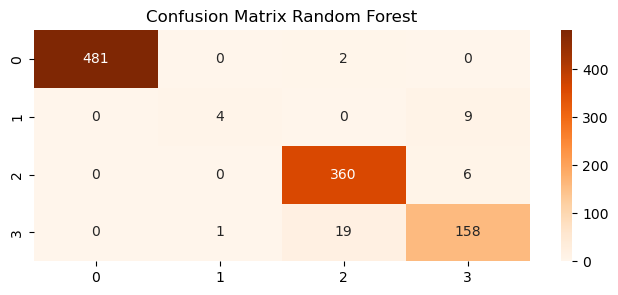

In [27]:
# Model perdormance on testing data 
print("Classification Report Random Forest: \n",classification_report(y_test,pred_test_data))

plt.figure(figsize=(8,3))
sns.heatmap(confusion_matrix(y_test,pred_test_data),annot=True,fmt='d', cmap='Oranges')
plt.title("Confusion Matrix Random Forest")
plt.show()

In [28]:
#Model 2 SVM

# Accessing the model and training it with the parameters
svm = RandomizedSearchCV(SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}, n_iter=4, cv=3, random_state=20)
svm.fit(x_train, y_train)
print("SVM Accuracy:", accuracy_score(y_test, svm.best_estimator_.predict(x_test)))




# Storing model performace on training data for visualization 
pred_train_data_svm=svm.predict(x_train)

# Storing model performace on testing data for visualization 

pred_test_data_svm=svm.predict(x_test)

SVM Accuracy: 0.9548076923076924


Classification Report SVM: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       483
           1       0.46      0.46      0.46        13
           2       0.94      0.98      0.96       366
           3       0.92      0.83      0.87       178

    accuracy                           0.95      1040
   macro avg       0.83      0.82      0.82      1040
weighted avg       0.95      0.95      0.95      1040



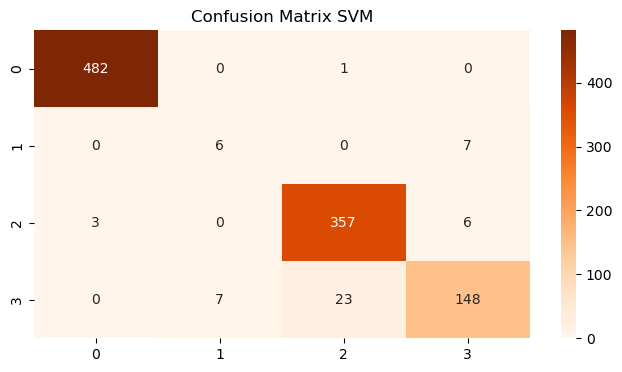

In [29]:
# Model perdormance on testing data 
print("Classification Report SVM: \n",classification_report(y_test,pred_test_data_svm))

plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test,pred_test_data_svm),annot=True,fmt='d', cmap='Oranges')
plt.title("Confusion Matrix SVM")
plt.show()

In [30]:
# Model 3: Gradient Boosting Classifier
gbc = RandomizedSearchCV(GradientBoostingClassifier(), {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1]}, n_iter=4, cv=3, random_state=20)
gbc.fit(x_train, y_train)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gbc.best_estimator_.predict(x_test)))

# Storing model performace on training data for visualization 
pred_train_data_gbc=gbc.predict(x_train)

# Storing model performace on testing data for visualization 

pred_test_data_gbc=gbc.predict(x_test)

Gradient Boosting Accuracy: 0.9615384615384616


Classification Report GBC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       0.60      0.46      0.52        13
           2       0.94      0.98      0.96       366
           3       0.92      0.87      0.89       178

    accuracy                           0.96      1040
   macro avg       0.86      0.83      0.84      1040
weighted avg       0.96      0.96      0.96      1040



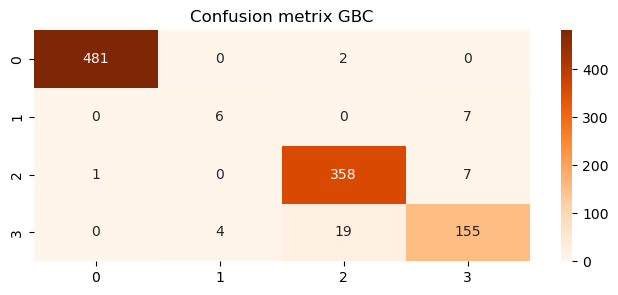

In [31]:
# Model perdormance on testing data 
print("Classification Report GBC")
print(classification_report(y_test, pred_test_data_gbc))

plt.figure(figsize=(8,3))
sns.heatmap(confusion_matrix(y_test,pred_test_data_gbc),annot=True,fmt='d', cmap='Oranges')
plt.title("Confusion metrix GBC")
plt.show()

In [32]:
# Feature Scaling for KNN
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1: Manhattan Distance, p=2: Euclidean Distance
}

# Randomized Search for better tuning
knn = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid_knn,
    n_iter=10,
    cv=5,
    random_state=10,
    n_jobs=-1
)

# Train the model
knn.fit(x_train_scaled, y_train)

# Predictions and Accuracy
print("Best KNN Parameters:", knn.best_params_)
print("KNN Accuracy:", accuracy_score(y_test, knn.best_estimator_.predict(x_test_scaled)))

# Saving predictions
pred_train_data_knn = knn.predict(x_train_scaled)
pred_test_data_knn = knn.predict(x_test_scaled)

Best KNN Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 5}
KNN Accuracy: 0.9471153846153846


KNN Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       483
           1       0.50      0.23      0.32        13
           2       0.91      0.98      0.94       366
           3       0.93      0.78      0.85       178

    accuracy                           0.95      1040
   macro avg       0.83      0.75      0.78      1040
weighted avg       0.94      0.95      0.94      1040



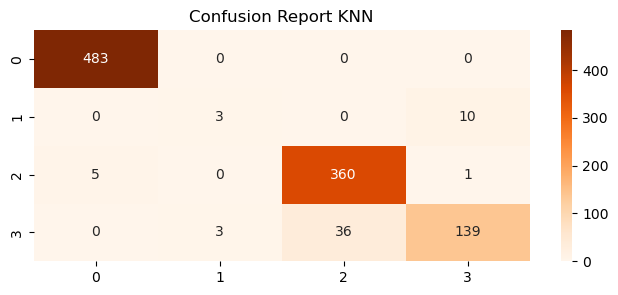

In [33]:
print("KNN Classification Report")
print(classification_report(y_test, pred_test_data_knn))

plt.figure(figsize=(8,3))
sns.heatmap(confusion_matrix(y_test,pred_test_data_knn),annot=True,fmt='d', cmap='Oranges')
plt.title("Confusion Report KNN")
plt.show()

In [34]:
# Reshaping x to a 2D array
from sklearn.preprocessing import StandardScaler

x = x.to_numpy().reshape(-1, 1)  # Convert DataFrame to 2D NumPy array
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)



In [40]:
#Model 4
# Defining XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=len(np.unique(y)), 
                            eval_metric="mlogloss", 
                            use_label_encoder=False)

# Parameter selection for the model
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # The learning rate
    'n_estimators': [100, 200, 400],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Depth of trees
    'min_child_weight': [1, 5, 10],  # Minimum sum of instance weight (hessian) in a child
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of training data
    'colsample_bytree': [0.6, 0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Randomized Search for finding the best parameters
xgb_random = RandomizedSearchCV(xgb_clf, param_distributions=param_grid, 
                                random_state=20, cv=5, scoring='accuracy', n_jobs=-1)

# Training the model with RandomizedSearchCV to find the best hyperparameters
xgb_random.fit(x_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {xgb_random.best_params_}")

# Get the best estimator
xgb_best = xgb_random.best_estimator_

# Predicting on training data
pred_train_xgb = xgb_best.predict(x_train)

# Predicting on testing data
pred_test_data_xgb = xgb_best.predict(x_test)

# Evaluate the XGBoost model performance
train_accuracy_xgb = accuracy_score(y_train, pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test, pred_test_xgb)


print(f"XGBoost Accuracy: {test_accuracy_xgb}")


Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
XGBoost Accuracy: 0.9653846153846154


Classification Report XGBoost 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       0.83      0.38      0.53        13
           2       0.95      0.98      0.96       366
           3       0.91      0.89      0.90       178

    accuracy                           0.97      1040
   macro avg       0.92      0.81      0.85      1040
weighted avg       0.96      0.97      0.96      1040



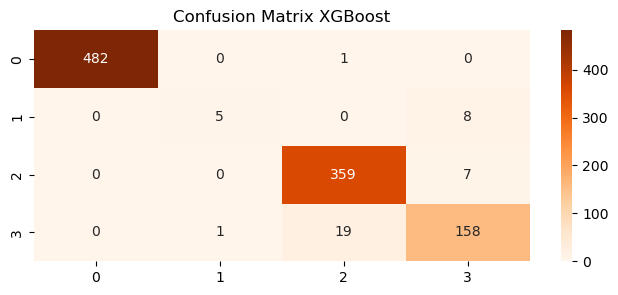

In [41]:
print("Classification Report XGBoost ")

print(classification_report(y_test, pred_test_data_xgb))

plt.figure(figsize=(8,3))
sns.heatmap(confusion_matrix(y_test, pred_test_data_xgb), annot=True, fmt= 'd', cmap= "Oranges")
plt.title("Confusion Matrix XGBoost")
plt.show()

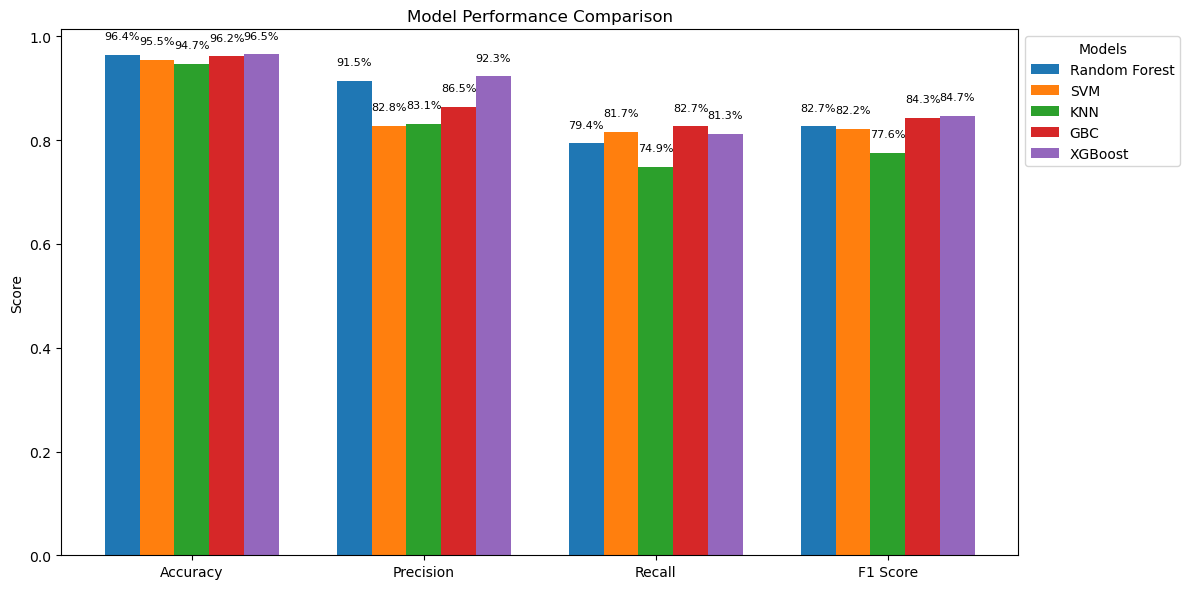

In [42]:
# Model names and predictions
models = ["Random Forest", "SVM", "KNN", "GBC", "XGBoost"]
predictions = [pred_test_data, pred_test_data_svm, pred_test_data_knn, pred_test_data_gbc, pred_test_data_xgb]

# Performance metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
scores = [
    [accuracy_score(y_test, pred), precision_score(y_test, pred, average='macro'),
     recall_score(y_test, pred, average='macro'), f1_score(y_test, pred, average='macro')]
    for pred in predictions
]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(metrics))  # Metric positions
width = 0.15  # Bar width

# Plot bars for each model
for i, score in enumerate(scores):
    ax.bar(x + i * width, score, width, label=models[i])

# Formatting the chart
ax.set_xticks(x + width * 2)  # Center ticks for metrics
ax.set_xticklabels(metrics)
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Models")  # Move legend to the side

# Add percentage labels on top of bars with dynamic positioning to avoid overlap
for i, score in enumerate(scores):
    for j, value in enumerate(score):
        ax.text(x[j] + i * width, value + 0.03, f"{value * 100:.1f}%", ha='center', fontsize=8)  # Reduced font size

# Adjust layout for clarity and avoid overlap of the legend
plt.tight_layout()

# Show plot
plt.show()
